# README

## 개발 소프트웨어
- 닮은 차트 찾기

## 개요
- 특정 날짜를 입력 받아서 해당 차트를 보여주고
- 비슷한 모양의 차트를 찾아서 차트 모양, 날짜, 다음날 등락 여부를 보여 주는 앱을 작성한다.

## 화면
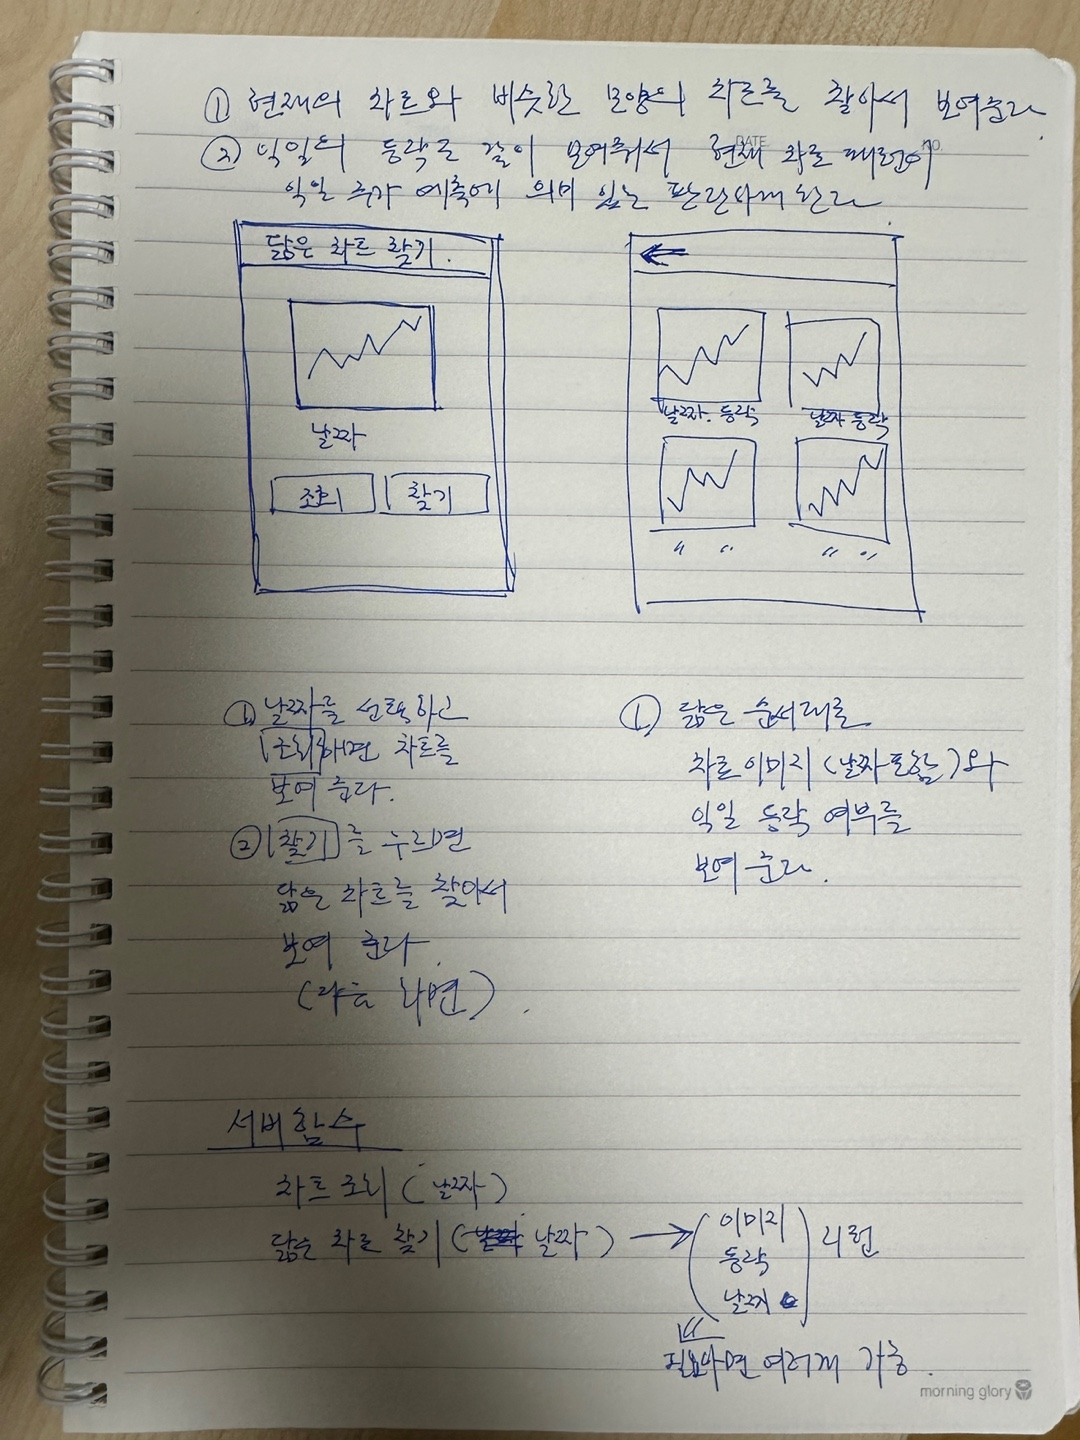

## 화일설명
- stock_perd.ipynb
    - yahoo에서 AAPL의 주가 데이터를 받아서 candle chart 이미지를 만들어서 저장한다.
        (255x255)
    - 차트이미지의 마지막 날짜와 익일의 등락을 저장한다.
    - VGG16 모델을 이용하여 feature를 extract하고 저장한다.
    - 날짜를 입력 받아서 해당 날짜가 마지막날인 차트이미지를 로드하고 feature_list의 요소들과 cos_similarity를 계산하여 비슷한 모양의 차트를 찾아낸다.
        - get_similar_images_info_by_date 함수
    - 추론에 필요한 정보들을 저장한다.(이미지, 마지막날짜, 라벨, feature_list, image_file리스트 등)

- server_fastapi.py
    - fastapi 요청에 응답하는 함수
    - .py화일 import가 안되어서 model inference하는 함수를 여기에 복사해 놨음.
    - /chart_image/2023-02-23
    
- uri
    - /chart_image/{query_date}
        - query_date를 마지막날짜로 하는 차트 이미지를 리턴한다.
    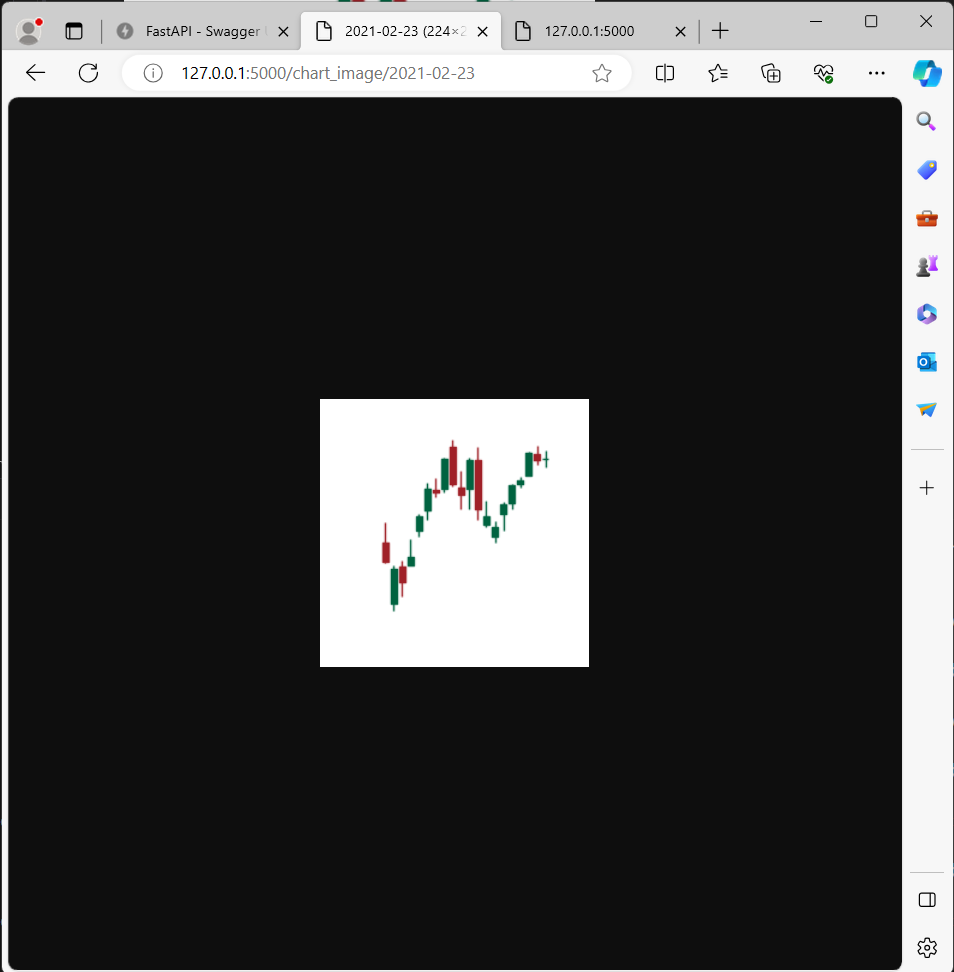
    - /get-similar-images/{query_date}
        - query_date를 마지막날짜로 하는 차트와 비슷한 모양의 차트의 이미지, 마지막날짜, 익일등락(1/0)을 리턴한다.
        - 현재 코드는 가장 비슷한 10개를 리턴한다.
        - 이미지를 텍스트로 변환해서 리턴하므로 클라이언트에서 이미지로 다시 변환해 줘야 한다.(리스트를 리턴하기 위해서)
    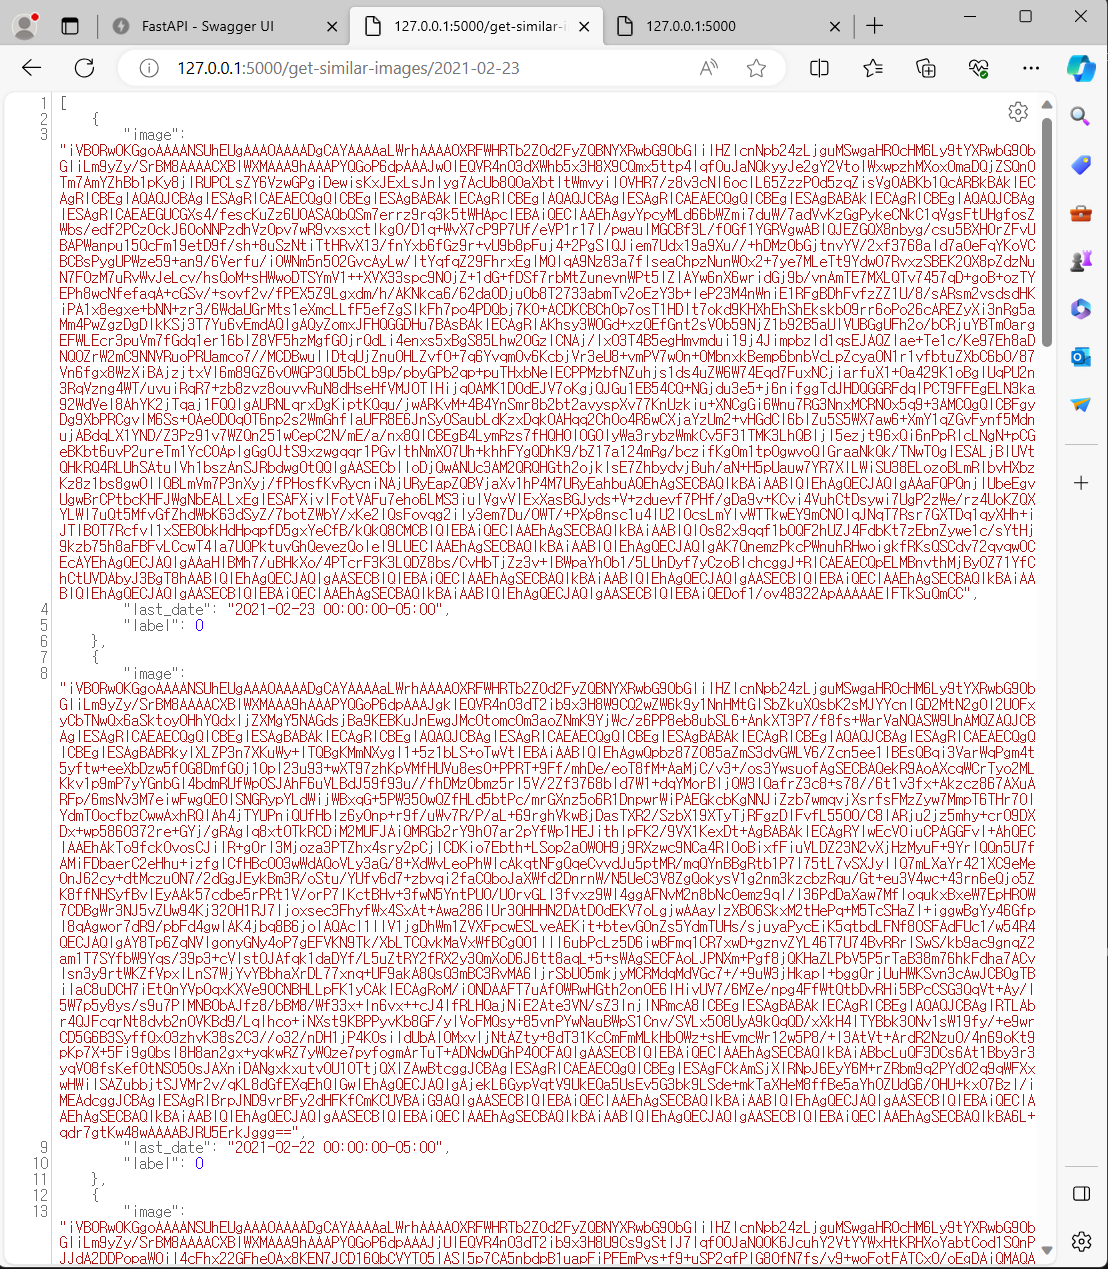

- 저장된 화일들
    - images 폴더 : 차트 이미지들
    - image_files : 차트 이미지 array데이터를 pickle화일로 저장
    - chart_data.csv : 각 차트의 마지막 날짜와 익일 등락(라벨) 저장
    - feature_list : pretrain된 VGG16을 이용하여 추출한 feature를 저장(화일 사이즈가 커서(800MB) github에는 올리지 않음)



## 회고

### 잘한 점
- 서버 모듈은 돌아가게 작성하였다.

### 문제점
- 클라이언트 모듈은 시작도 못했다.
- .py 화일을 import하여 함수를 사용하는 것이 안되었다.
- 서버모듈에서 client의 요청을 받을 때마다 새로 모델을 로드하고 할 수는 없는 일이라, 실행에 필요한 정보를 메모리 어딘가에 저장하고 있어야 할 것이다. 그런데, 그 방법을 모르겠다. 서비스를 하기위해서는 꼭 해결해야 할 문제이다.

### 배운 점
- fastAPI와 비슷한 이미지를 찾는 방법에 대해서 배웠다.